In [1]:
# ref:http://blog.csdn.net/dgatiger/article/details/50414549
# 载入pyplot之前进行字体设置
import matplotlib  
matplotlib.use('qt4agg')  
#指定默认字体  
matplotlib.rcParams['font.sans-serif'] = ['SimHei']   
matplotlib.rcParams['font.family']='sans-serif'  
#解决负号'-'显示为方块的问题  
matplotlib.rcParams['axes.unicode_minus'] = False   

In [2]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np
%matplotlib inline

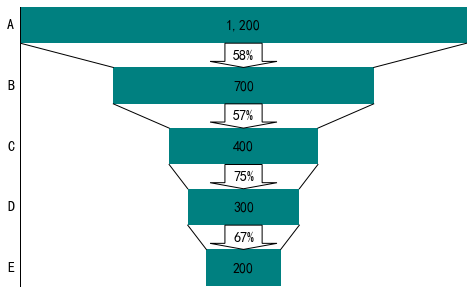

In [3]:
tags = ['A','B','C','D','E']
vals = [1200,700,400,300,200]
val_max = max(vals)
val_min = min(vals)
val_cnt = len(vals)
val_gap = [(val_max-i)/2 for i in vals]
y_pos = np.arange(val_cnt,0,-1)

# 设置条形图的宽度
bar_height = 0.6

fig,ax = plt.subplots()
fig.set_figheight(5)
fig.set_figwidth(8)
fig.set_facecolor('w')

#ax.spines['left'].set_color('none')
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.spines['bottom'].set_color('none')

ax.xaxis.set(visible = False)
# ax.yaxis.set(visible = False)
ax.tick_params(axis='y',direction = 'inout',length = 0)

ax.set_yticks(y_pos)
ax.set_yticklabels(tags,fontdict={'size':14})


bar = ax.barh(bottom = y_pos, width = vals, left= val_gap,height = bar_height,\
              color='teal',edgecolor = 'none',align = 'center')

#  在每个bar上添加数字标签
for i in range(val_cnt):
    ax.text(val_max/2,y_pos[i],'{:,}'.format(vals[i]),fontsize = 14, color='black',verticalalignment='center',horizontalalignment='center')

for i in range(1,val_cnt):
    # 漏斗图左侧的线条
    # ax.plot([0,10], [3-bar_height/2,2+bar_height/2], color='k', linestyle='-', linewidth=2)
    ax.plot([val_gap[i-1],val_gap[i]], [y_pos[i-1]-bar_height/2,y_pos[i]+bar_height/2], color='k', linestyle='-', linewidth=1)
    
    # 漏斗图右侧的线条
    # ax.plot([100,10+80], [3-bar_height/2,2+bar_height/2], color='k', linestyle='-', linewidth=2)
    ax.plot([vals[i-1]+val_gap[i-1],vals[i]+val_gap[i]], [y_pos[i-1]-bar_height/2,y_pos[i]+bar_height/2], color='k', linestyle='-', linewidth=1)

    # 添加转化率的箭头
    # ax.arrow(50,2.8,0,-0.4,head_width=20, head_length=0.2,width=10,linewidth=1,facecolor ='none')
    ax.arrow(val_max/2,y_pos[i-1]-0.5*bar_height,0,-(1-bar_height)*3/4,head_length=(1-bar_height)/4,\
             head_width=min(val_min*0.9,val_max/5), width=min(val_min*0.5,val_max/10),linewidth=1,facecolor ='none')
    
    ax.text(val_max/2,(y_pos[i-1]+y_pos[i])/2,\
            '{:0.0%}'.format(vals[i]/vals[i-1]),fontsize = 14, color='black',\
            verticalalignment='center',horizontalalignment='center')


plt.show()

D:\Users\hongsheng.cheng\AppData\Local\Continuum\Anaconda3\lib\site-packages\matplotlib\patches.py:107: UserWarning: Setting the 'color' property will overridethe edgecolor or facecolor properties. 
  warnings.warn("Setting the 'color' property will override"


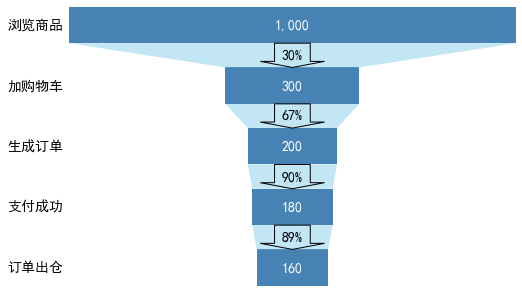

In [5]:
tags = ['浏览商品','加购物车','生成订单','支付成功','订单出仓']
vals = [1000,300,200,180,160]
val_max = max(vals)
val_min = min(vals)
val_cnt = len(vals)
val_gap = [(val_max-i)/2 for i in vals]
y_pos = np.arange(val_cnt,0,-1)

# 设置条形图的宽度
bar_height = 0.6

# 基本绘图设置
fig,ax = plt.subplots()
fig.set_figheight(5)
fig.set_figwidth(8)
fig.set_facecolor('w')

ax.spines['left'].set_color('none')
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.spines['bottom'].set_color('none')

ax.xaxis.set(visible = False)
# ax.yaxis.set(visible = False)
ax.tick_params(axis='y',direction = 'inout',length = 0)

ax.set_yticks(y_pos)
ax.set_yticklabels(tags,fontdict={'size':14})

bar = ax.barh(bottom = y_pos, width = vals, left= val_gap,height = bar_height,\
              color='steelblue',edgecolor = 'none',align = 'center',zorder=0)


for i in range(1,val_cnt):
    # 漏斗图左侧的线条
    # ax.plot([0,10], [3-bar_height/2,2+bar_height/2], color='k', linestyle='-', linewidth=2)
    # ax.plot([val_gap[i-1],val_gap[i]], [y_pos[i-1]-bar_height/2,y_pos[i]+bar_height/2], color='k', linestyle='-', linewidth=1)
    
    # 漏斗图右侧的线条
    # ax.plot([100,10+80], [3-bar_height/2,2+bar_height/2], color='k', linestyle='-', linewidth=2)
    # ax.plot([vals[i-1]+val_gap[i-1],vals[i]+val_gap[i]], [y_pos[i-1]-bar_height/2,y_pos[i]+bar_height/2], color='k', linestyle='-', linewidth=1)

   


    # 添加梯形
    # 设定梯形的4个角对应的坐标值
    # coords = [[0,4.8],[1000,4.8],[900,4.2],[100,4.2]]
    coords = [[val_gap[i-1], y_pos[i-1] - bar_height/2],\
              [vals[i-1] + val_gap[i-1], y_pos[i-1] - bar_height/2],\
              [vals[i] + val_gap[i], y_pos[i] + bar_height/2],\
              [val_gap[i], y_pos[i] + bar_height/2]]
    coords_array = np.array(coords)

    p = mpatches.Polygon(coords_array, True,color='skyblue',edgecolor = 'none',linewidth = 0,zorder=0,alpha=0.5)
    ax.add_patch(p)

    # 添加转化率的箭头
    # ax.arrow(50,2.8,0,-0.4,head_width=20, head_length=0.2,width=10,linewidth=1,facecolor ='none')
    ax.arrow(val_max/2,y_pos[i-1]-0.5*bar_height,0,-(1-bar_height)*3/4,head_length=(1-bar_height)/4,\
             head_width=min(val_min*0.9,val_max/5), width=min(val_min*0.5,val_max/10),linewidth=1,facecolor ='none')
    
    # 在转化率箭头上添加数字标签
    ax.text(val_max/2,(y_pos[i-1]+y_pos[i])/2,'{:0.0%}'.format(vals[i]/vals[i-1]),fontsize = 14, color='black',verticalalignment='center',horizontalalignment='center')

#  在每个bar上添加数字标签
for i in range(val_cnt):
    ax.text(val_max/2,y_pos[i],'{:,}'.format(vals[i]),fontsize = 14, color='white',verticalalignment='center',horizontalalignment='center')

plt.show()